In [2]:
import pandas as pd
df_clusters = pd.read_csv('C:\\Users\\Brend\\Downloads\\clusters_top42.csv', index_col = 'name', encoding = "UTF-8")
df_pct_collab = pd.read_csv('C:\\Users\\Brend\\Downloads\\pct_collaborative_pubs_top42.csv', index_col = 'name', encoding = 'UTF-8')
df_pct_collab_new = pd.read_csv('C:\\Users\\Brend\\Downloads\\pct_collaborative_pubs_top42_v2.csv', index_col = 'name', encoding = 'UTF-8')
df_impact = pd.read_csv('C:\\Users\\Brend\\Downloads\\impact_top42.csv', index_col = 'name', encoding = 'UTF-8')
df_author_focus = pd.read_csv('C:\\Users\\Brend\\Downloads\\community_focus_top42.csv', index_col = 'name', encoding = 'UTF-8')
df_disrupt = pd.read_csv('C:\\Users\\Brend\\Downloads\\disrupt_top42.csv', index_col = 'name', encoding = 'UTF-8')

In [3]:
df_all = df_pct_collab.join(df_clusters[['TotalConns', 'InterClusterRatio', 'IntraClusterRatio']], how = 'outer')
df_all = df_all.join(df_impact, how = 'outer')
df_all = df_all.join(df_author_focus, how = 'outer')
df_all = df_all.join(df_disrupt, how = 'outer')

In [4]:
df_trimmed = df_all[df_all['num_pubs'] >= 50]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 368618 authors


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

In [6]:
linear_metrics = ['pct_collab_linauth', 'pct_collab_linprof', 
                  'pct_collab_sqrtauth', 'pct_collab_sqrtprof', 
                  'pct_collab_unweighted', 'InterClusterRatio', 
                  'IntraClusterRatio']
log_metrics = ['IntraCommunityFocus', 'InterCommunityFocus']
all_metrics = linear_metrics + log_metrics
impact = ['avg_PR', 'max_PR', 'avg_AR', 'max_AR']
disrupt = ['avg_disrupt', 'max_disrupt', 'median_disrupt', 'min_disrupt']


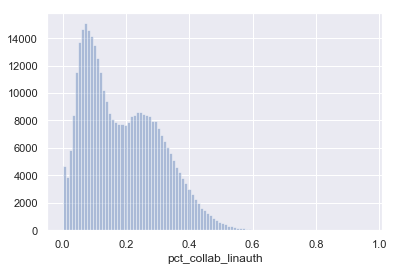

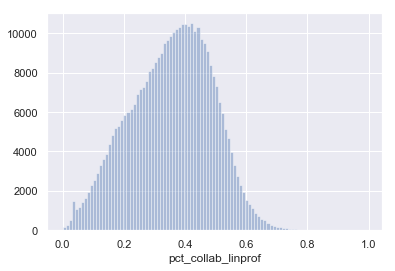

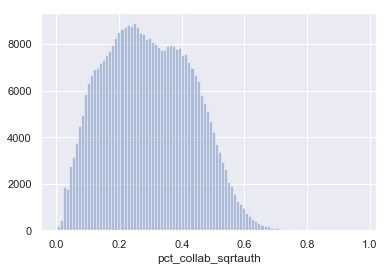

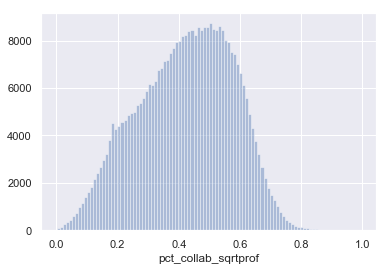

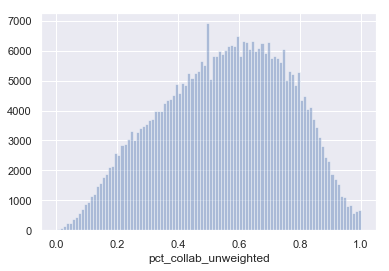

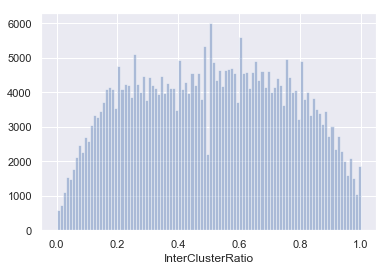

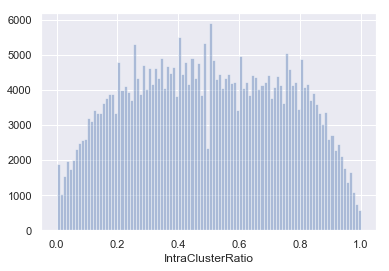

In [34]:
for col in linear_metrics:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    plt.show()

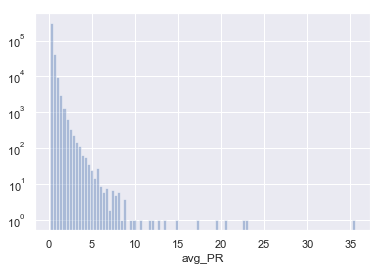

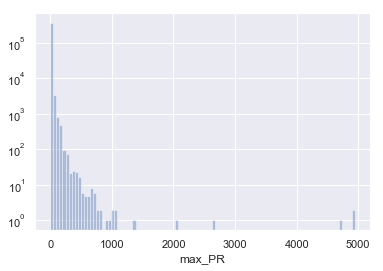

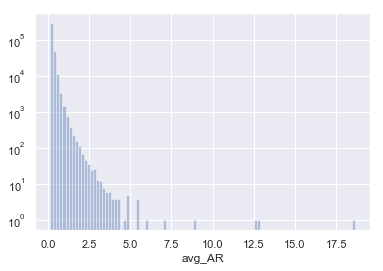

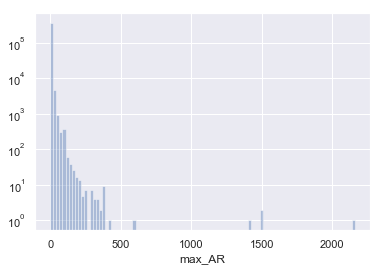

In [35]:
for col in impact:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

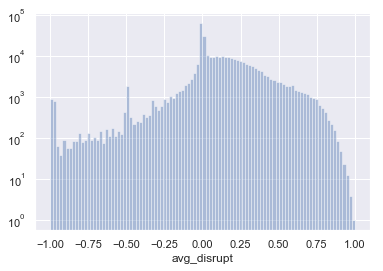

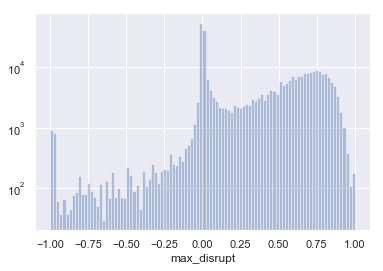

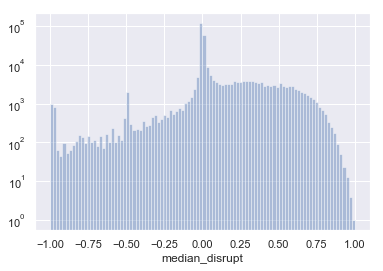

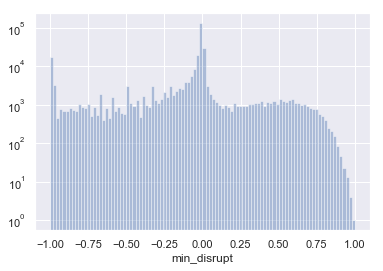

In [7]:
for col in disrupt:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

In [38]:
df_all = df_pct_collab_new.join(df_clusters[['TotalConns', 'InterClusterRatio', 'IntraClusterRatio']], how = 'outer')
df_all = df_all.join(df_impact, how = 'outer')
df_all = df_all.join(df_author_focus, how = 'outer')
df_trimmed = df_all[df_all['num_pubs'] >= 50]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 368618 authors


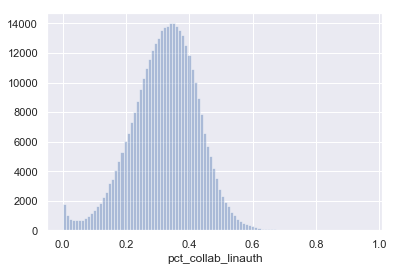

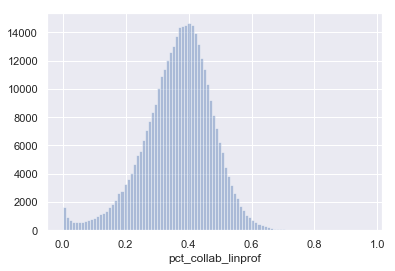

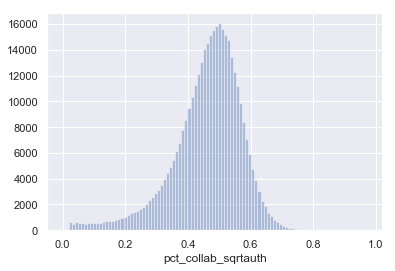

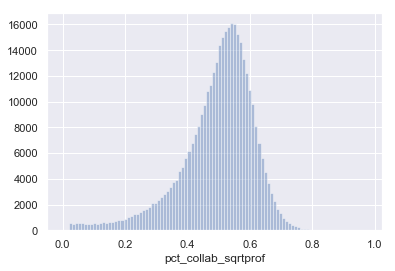

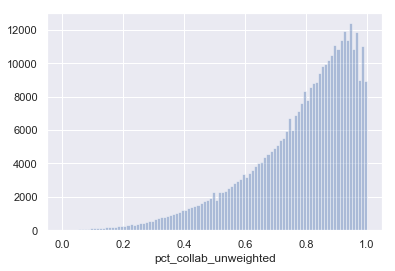

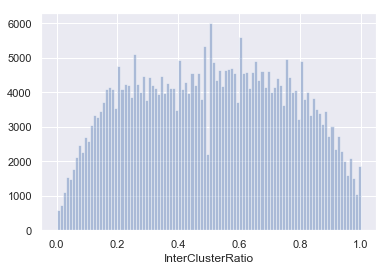

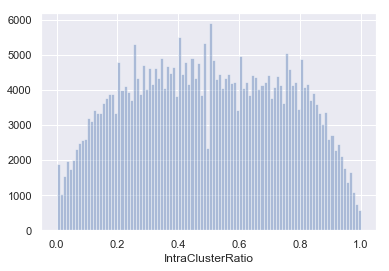

In [39]:
for col in linear_metrics:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    plt.show()